<h2>Query 6.1

In [1]:
import pandas as pd
close_price_30 = pd.DataFrame([])

In [2]:
import os
# Iterate over all 30 stocks
for i in os.listdir("./30_Stock_files/"):
    current_df = pd.read_csv("./30_Stock_files/"+str(i))
    # Take rows only with Series 'EQ'
    current_df = current_df[current_df.Series == 'EQ'].reset_index(drop=True)
    # Take Closing Price column from each stock
    close_price_30[current_df.Symbol[0]] = current_df["Close Price"]

print(f"Shape of close_price_30 : {close_price_30.shape[0]} Rows & {close_price_30.shape[1]} Columns")
close_price_30.head()

Shape of close_price_30 : 494 Rows & 30 Columns


,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
0,231.90,216.05,1148.05,341.15,1332.95,266.65,431.40,1553.40,3515.45,983.25,...,772.80,563.90,32.00,1344.10,162.65,912.20,83.55,2365.10,1169.70,431.85
1,234.40,214.90,1142.85,347.00,1347.75,266.10,424.45,1559.65,3619.40,1000.40,...,785.00,562.60,32.10,1356.30,158.60,894.70,83.85,2429.15,1177.00,432.45
2,237.35,217.00,1154.95,349.85,1324.80,264.85,429.00,1557.15,3645.95,1009.40,...,783.65,564.25,31.95,1353.10,158.25,887.05,85.35,2455.35,1188.00,430.20
3,232.65,209.65,1151.35,334.10,1314.55,260.35,417.95,1557.10,3592.05,990.25,...,746.95,552.15,31.05,1327.35,157.40,871.35,83.75,2536.20,1156.90,414.10
4,234.65,206.25,1123.15,336.20,1289.15,254.05,404.20,1561.25,3571.65,1008.00,...,723.10,555.45,30.55,1318.85,151.90,852.40,84.15,2507.15,1161.65,415.75


<h2>Query 6.2

In [3]:
one_yr_clse_prc = close_price_30.tail(252).reset_index(drop=True)
one_yr_clse_prc.tail()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
247,195.20,118.10,1387.80,557.75,3017.05,163.15,116.60,2322.35,2527.35,1697.50,...,808.95,665.95,2.1,1343.50,340.50,551.10,64.35,2151.95,2000.45,601.45
248,191.75,115.45,1385.70,534.45,2921.30,161.30,116.30,2307.25,2499.70,1688.70,...,807.10,652.80,2.2,1299.45,338.10,528.90,64.50,2152.85,1956.70,576.65
249,185.30,115.30,1354.20,531.85,2971.35,160.50,116.00,2290.90,2537.75,1703.75,...,805.30,661.85,2.3,1256.45,332.95,540.70,64.40,2172.55,1930.10,574.10
250,190.95,117.45,1341.05,540.90,2922.85,160.50,116.40,2296.50,2507.30,1687.45,...,804.40,675.00,2.4,1251.15,332.85,541.15,63.80,2135.80,1820.65,580.05
251,186.20,117.15,1332.50,541.55,2931.85,162.85,110.95,2287.20,2510.75,1702.00,...,779.35,659.50,2.3,1232.05,339.80,535.65,62.60,2128.75,1706.75,572.20


In [4]:
daily_perc_return = one_yr_clse_prc.pct_change(fill_method='ffill').dropna()*100

In [5]:
annual_perc_return = daily_perc_return.mean()
annual_perc_return.head()

APOLLOTYRE   -0.152627
ASHOKA       -0.291083
ASIANPAINT    0.055553
BAJAJELEC    -0.037507
BAJFINANCE    0.206037
dtype: float64

In [6]:
annual_volatility = daily_perc_return.std()
annual_volatility.head()

APOLLOTYRE    1.946514
ASHOKA        3.242312
ASIANPAINT    1.463245
BAJAJELEC     2.367102
BAJFINANCE    2.206760
dtype: float64

<h2>Query 6.3

In [7]:
# Dataframe with column annual returns and annual volatilities
clustering_data = pd.DataFrame({'Returns':annual_perc_return, 'Volatilities':annual_volatility})

In [8]:
from sklearn.cluster import KMeans

# define how many cluster we want to test
cluster_num = 8

# define the dataframe that will contains all our relevant information for each cluster size.
diff_cluster_result = pd.DataFrame(index=pd.np.arange(2,cluster_num+1), 
                                   columns=['loss', 'score','center_returns', 'center_volatility', 'cluster_label', 'model'])

for k in range(2, cluster_num+1):
    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
    
    # Inertia/Loss/Distortion: Sum of distances of samples to their closest cluster center.
    diff_cluster_result['loss'][k] = kmeans.inertia_
    diff_cluster_result['center_returns'][k] = kmeans.cluster_centers_[:,0]
    diff_cluster_result['center_volatility'][k] = kmeans.cluster_centers_[:,1]
    diff_cluster_result['cluster_label'][k] = kmeans.labels_.astype(float)
    diff_cluster_result['score'][k] = kmeans.score
    diff_cluster_result['model'][k] = kmeans 

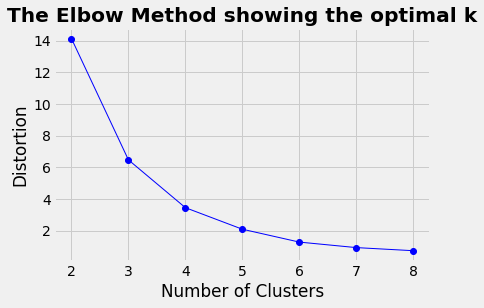

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
with plt.style.context('fivethirtyeight'):
    plt.plot(diff_cluster_result.index.values, diff_cluster_result.loss, 'bo-', linewidth=1)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.title('The Elbow Method showing the optimal k', fontweight='bold')
    plt.show()

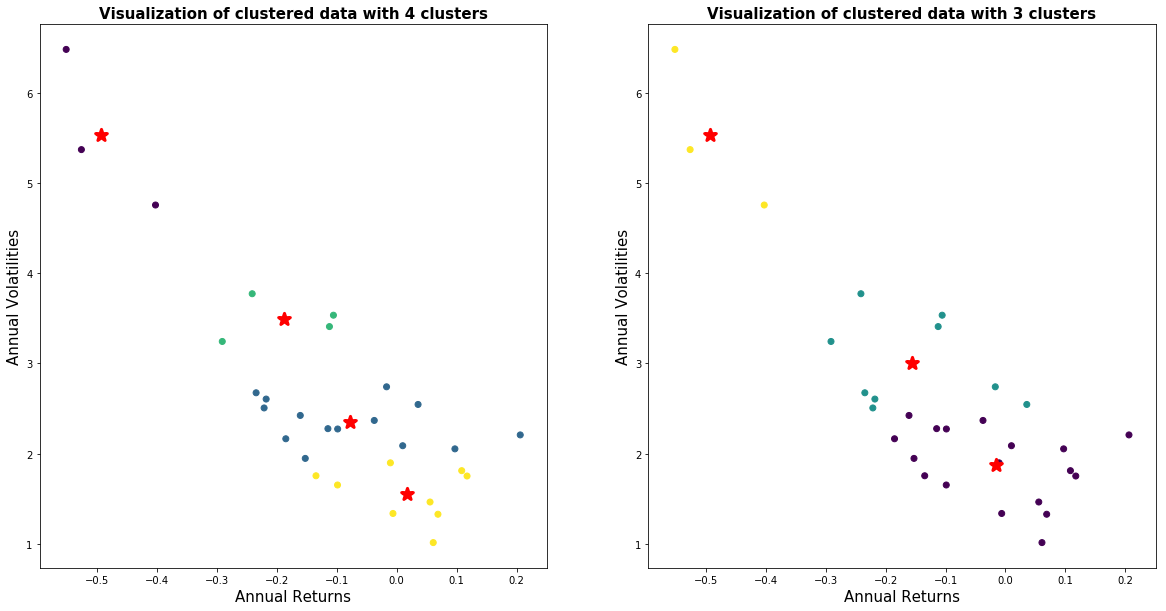

In [10]:
plt.figure(figsize=(20,10))
for cluster in [4,3]:
    plt.subplot(1,2,cluster%2+1)
    plt.scatter(clustering_data.Returns, clustering_data.Volatilities, c=diff_cluster_result.cluster_label[cluster], cmap='viridis')
    plt.scatter(diff_cluster_result.center_returns[cluster], diff_cluster_result.center_volatility[cluster], marker='*', c='r', s=150, linewidth=3)
    plt.ylabel('Annual Volatilities', fontsize=15)
    plt.xlabel('Annual Returns', fontsize=15)
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold', fontsize=15)
plt.show()

In [11]:
k_optimized = 4
kmeans_optimized = diff_cluster_result.loc[k_optimized]

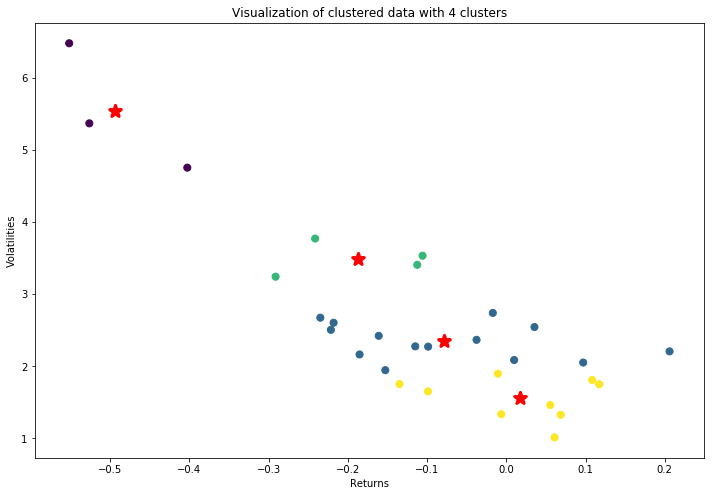

In [12]:
clustering_data.plot(kind='scatter', x='Returns', y='Volatilities', 
                     c=kmeans_optimized.cluster_label, s=50, 
                     cmap='viridis', colorbar=False, figsize=(12,8), 
                     title='Visualization of clustered data with {} clusters'.format(k_optimized))
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='r', s=150, linewidths=3)
plt.show()

<h2>Query 6.4

In [13]:
# Add Cluster number label in Clustering_data dataframe
clustering_data['label'] = diff_cluster_result.cluster_label[k_optimized].astype(int)+1

#  separate Data frame to show which stocks belong to the same cluster 
all_clusters = [i[1] for i in clustering_data.groupby('label')]
cluster1, cluster2, cluster3, cluster4 = all_clusters

# Display which stocks belongs to which cluster
print("STOCKS IN", "-"*50,sep='\n')
for cluster in all_clusters:
    print(f"Cluster {cluster.label[0]} : ",end=""); print(*cluster.index.values, sep=", ",end='\n\n')

STOCKS IN
--------------------------------------------------
Cluster 1 : DHFL, JETAIRWAYS, RCOM

Cluster 2 : APOLLOTYRE, BAJAJELEC, BAJFINANCE, CENTURYPLY, IDBI, LUXIND, MINDTREE, NBCC, PNB, PVR, RAYMOND, SONATSOFTW, SUNTV, TATAPOWER

Cluster 3 : ASHOKA, INFY, TCS, VENKEYS

Cluster 4 : ASIANPAINT, HDFCBANK, HEROMOTOCO, HINDUNILVR, LT, MARUTI, RBLBANK, RELIANCE, VOLTAS



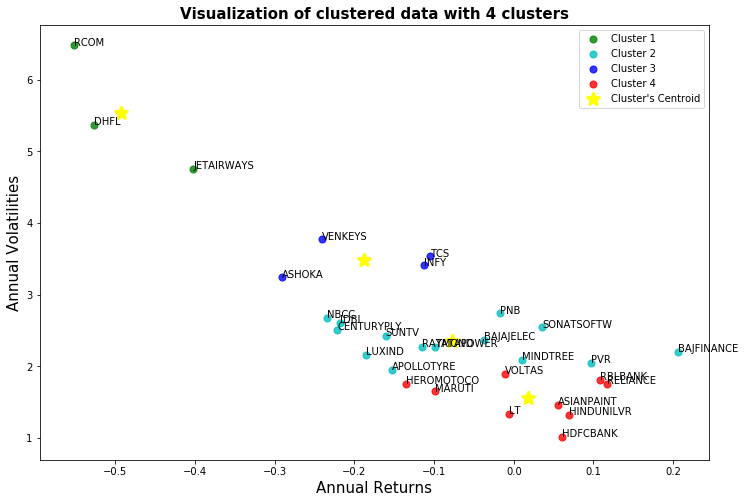

In [14]:
plt.figure(figsize=(12,8))

# Plot all clusters
for i in range(len(all_clusters)):
    plt.scatter(all_clusters[i].Returns, all_clusters[i].Volatilities, s=50, label=f"Cluster {i+1}", c=list('gcbr')[i], alpha=0.8)

# Annotate stock name to each data point
for i in range(len(clustering_data)):
    plt.annotate(clustering_data.index[i], (clustering_data.Returns[i], clustering_data.Volatilities[i]))
    
# Plot Centriod of each cluster
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='yellow', s=150, linewidth=3, label="Cluster's Centroid")

plt.title("Visualization of clustered data with 4 clusters", fontweight='bold', fontsize=15)
plt.xlabel("Annual Returns", fontsize=15)
plt.ylabel("Annual Volatilities", fontsize=15)
plt.legend()
plt.show()